# TMDB 5000 Movie Analysis

## Backgroud
#### we have a dataset of TMDB 5000 Movie.
#### Our aim is answering the following questions:
- Clustering data by PCA and K-means.
- What type of movie did people like the most varied by years?
- What factors lead to the success of a movie (higher interests or higher reviews)?
- Build word cloud for the genra/keyword/production_company's name/production_country/tagline.
- Top ten artist/movie/genra/title with the most popularity/revenue/vote_average/budget

## Import libaries

In [4]:
import numpy as np
# for algorithm
import pandas as pd
# to read and manipulate dataset
import statsmodels as mod
# to generate statistical models such as logistic etc.
import matplotlib.pyplot as plt
# for visualization
import seaborn as sns
# for temperature/violin plot
from sklearn.decomposition import PCA 
# Principal Component Analysis module
from sklearn.cluster import KMeans 
# KMeans clustering 

In [5]:
## Import dataset

In [6]:
crd = pd.read_csv("Desktop/tmdb_5000_credits.csv")
mv = pd.read_csv("Desktop/tmdb_5000_movies.csv")
# read data set by pandas

In [7]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [8]:
crd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [9]:
crd.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
mv.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## Merge data

In [11]:
fm = pd.DataFrame(pd.merge(crd, mv, left_on="movie_id", right_on = "id", how = "inner"))

In [12]:
del fm["movie_id"]
# merge two data sets and drop the duplicate variable movie_id

In [13]:
fm.head()
# display the new merged fm dataset

,title_x,cast,crew,budget,genres,homepage,id,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [14]:
fm.info()
# note that there are missing value in column homepage and tagline. 
# Delete these column in the next step

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title_x               4803 non-null   object 
 1   cast                  4803 non-null   object 
 2   crew                  4803 non-null   object 
 3   budget                4803 non-null   int64  
 4   genres                4803 non-null   object 
 5   homepage              1712 non-null   object 
 6   id                    4803 non-null   int64  
 7   keywords              4803 non-null   object 
 8   original_language     4803 non-null   object 
 9   original_title        4803 non-null   object 
 10  overview              4800 non-null   object 
 11  popularity            4803 non-null   float64
 12  production_companies  4803 non-null   object 
 13  production_countries  4803 non-null   object 
 14  release_date          4802 non-null   object 
 15  revenue              

In [15]:
del fm['homepage']

In [16]:
del fm['tagline']

In [17]:
del fm['title_y']

In [25]:
fm.head()
# delete leat-relavant variable

,title_x,cast,crew,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count
0,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,7.2,11800
1,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,6.9,4500
2,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,6.3,4466
3,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,7.6,9106
4,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,6.1,2124


In [26]:
# Get the approxinate statistics of the data set
summary = fm.describe()
summary

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## Standalize the numeric data 

In [27]:
from sklearn.preprocessing import StandardScaler
# import the package to standalize data

In [28]:
x = fm.select_dtypes(include=[np.number])
print(x)
x_std = StandardScaler().fit_transform(x)
print(x_std)

         budget      id  popularity     revenue  runtime  vote_average  \
0     237000000   19995  150.437577  2787965087    162.0           7.2   
1     300000000     285  139.082615   961000000    169.0           6.9   
2     245000000  206647  107.376788   880674609    148.0           6.3   
3     250000000   49026  112.312950  1084939099    165.0           7.6   
4     260000000   49529   43.926995   284139100    132.0           6.1   
...         ...     ...         ...         ...      ...           ...   
4798     220000    9367   14.269792     2040920     81.0           6.6   
4799       9000   72766    0.642552           0     85.0           5.9   
4800          0  231617    1.444476           0    120.0           7.0   
4801          0  126186    0.857008           0     98.0           5.7   
4802          0   25975    1.929883           0     90.0           6.3   

      vote_count  
0          11800  
1           4500  
2           4466  
3           9106  
4           2124

## Visualization
### PCA and Clustering (Correlation)
#### Correlation and heatmap

In [29]:
# find correlations and list 
corr = fm.corr()
corr

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180
id,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128
popularity,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000


Text(0.5, 1, 'Heatmap')

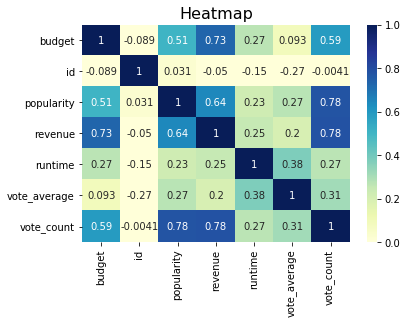

In [30]:
# generate a heatmap to see the correlation among each colms obviously
sns.heatmap(corr, vmin=0, vmax=1, cmap="YlGnBu", annot = True)
plt.title("Heatmap", fontsize = 16)

Define corr > abs(0.7) as strong correlated.
Then budget and revenue / popularity and vote_count/ revnue and vote_count are strong positive correlated.
On the other world, as budget increases, the revenue increases, the vote_count increases.
As the popularity increases, the vote_count increases.
Thus in order to be more popular, the film company will get more revnue. 
The budget is weak correlated so it can not decide the revenure, popularity and public reputation of a film.
Furthermore, we can use PCA to reduce the dimension since many varianble are less correlated.

#### Principle Complenent Analysis (PCA)

In [31]:
# Since there's an error occur says that there's missing value or infinit value
# We use following 2 code to check that.

In [32]:
np.any(np.isnan(x_std))

True

In [33]:
np.all(np.isfinite(x_std))

False

In [34]:
# Since the second one get false, we need to round the x_std to a finite value
# Since there's missing value, we need to change these to 0.
x1 = x_std.round(2)
x1 = pd.DataFrame(x1)
x1.fillna(0, inplace=True)
print(x1)

         0     1     2      3     4     5     6
0     5.11 -0.42  4.05  16.62  2.44  0.93  9.00
1     6.65 -0.64  3.70   5.40  2.75  0.68  3.09
2     5.30  1.69  2.70   4.90  1.82  0.17  3.06
3     5.43 -0.09  2.85   6.16  2.57  1.26  6.82
4     5.67 -0.09  0.71   1.24  1.11  0.01  1.16
...    ...   ...   ...    ...   ...   ...   ...
4798 -0.71 -0.54 -0.23  -0.49 -1.14  0.43 -0.37
4799 -0.71  0.18 -0.66  -0.51 -0.97 -0.16 -0.56
4800 -0.71  1.97 -0.63  -0.51  0.58  0.76 -0.55
4801 -0.71  0.78 -0.65  -0.51 -0.39 -0.33 -0.55
4802 -0.71 -0.35 -0.61  -0.51 -0.75  0.17 -0.55

[4803 rows x 7 columns]


In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca1 = pca.fit_transform(x1)
pca1
# PCA code

array([[17.48991195,  3.61936017, -2.53164987, ..., -1.62923698,
        -8.07470298,  3.58717473],
       [ 9.60912744,  0.95692364, -1.59218333, ..., -1.18611543,
         1.03060179,  0.83869497],
       [ 7.80576791,  2.61965362, -0.03805255, ..., -1.61510602,
         0.16754968,  0.52260429],
       ...,
       [-0.92317616,  0.12102453,  2.16533844, ..., -0.77636274,
        -0.12199297,  0.12151705],
       [-1.35062636,  0.46482628,  0.50121529, ..., -0.16024986,
        -0.20017462,  0.02595116],
       [-1.23122631, -0.34227622, -0.288908  , ..., -0.16620063,
        -0.13796579,  0.03496554]])

In [36]:
print(pca.components_)

[[ 0.42930038 -0.06694632  0.45580789  0.48808272  0.25209144  0.23254263
   0.49760187]
 [ 0.15838517  0.60514028  0.15453974  0.17431259 -0.44720351 -0.58093768
   0.13027817]
 [-0.33306832  0.7357296   0.13686653 -0.17744712  0.40339346  0.36199627
   0.06148123]
 [-0.36431858 -0.09180901  0.3096888  -0.04835769 -0.70829029  0.46466063
   0.20739531]
 [-0.48823512 -0.28084663  0.5388323  -0.19652189  0.26163348 -0.50134542
   0.18436712]
 [ 0.51724304  0.02088027  0.51313632 -0.56342549 -0.05655051  0.08983981
  -0.37416218]
 [-0.20258058  0.01690207  0.31633512  0.58437599  0.0201859   0.04545449
  -0.71738319]]


In [37]:
print(pca.explained_variance_)

[3.27688118 1.34228756 0.84114389 0.71247648 0.41168597 0.25748973
 0.15981543]


Text(0.5, 1.0, 'Explained Var Plot')

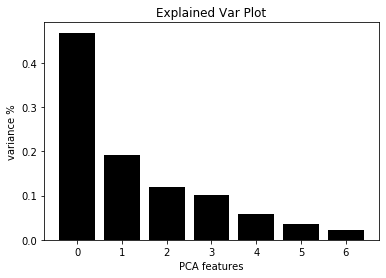

In [38]:
# Plot the explained variance
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.title("Explained Var Plot")

In [39]:
# Clustering by PCA (2 components)
PCA_components = pd.DataFrame(pca1)

Text(0, 0.5, 'PCA 2')

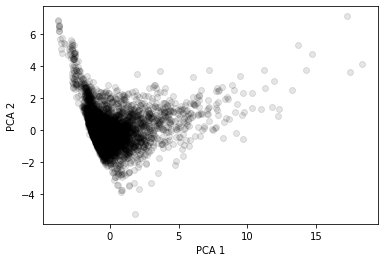

In [40]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

#### K-means Clustering

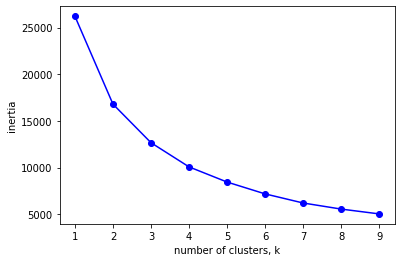

In [41]:
# Determing value of K in K-means
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='blue')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [42]:
# Since after 2, the change in the value of inertia is not significant, then choose k=2
# Plot K-means
model = KMeans(n_clusters=2, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

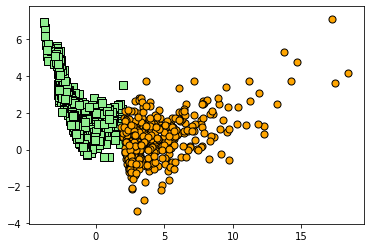

In [43]:
model = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

y_km = model.fit_predict(PCA_components)
PCA_components = np.array(PCA_components)

plt.scatter(
    PCA_components[y_km == 0, 0], PCA_components[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    PCA_components[y_km == 1, 0], PCA_components[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)


## Wordcloud

#### CAST

In [87]:
# drop dup movie rows
fm = fm.drop_duplicates(subset="title_x")

# fill nan
fm = fm.fillna(0)

fm.cast[0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [75]:
pd.DataFrame(fm.cast)

,cast
0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""..."
1,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa..."
2,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr..."
3,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba..."
4,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c..."
...,...
4798,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c..."
4799,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_..."
4800,"[{""cast_id"": 8, ""character"": ""Oliver O\u2019To..."
4801,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id..."


#### Genres

#### Keyword

#### Production companies

#### Production countries

## Movie with highest popularity/vote_average/vote_count/budget/revenue